<a href="https://www.kaggle.com/manaswini25/402083005-manaswini-gupta?scriptVersionId=90292675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [80]:

import numpy as np #for loading dataframe
import pandas as pd #for numeric computations
import seaborn as sb #high level visualization
import matplotlib.pyplot as plt # for visualization
from pylab import rcParams #setting default size of my visualizations
from collections import Counter # for counting levels of variables 
from IPython.display import display_html #to display in html formats
sb.set_palette('Set1') #default color palette to use
rcParams['figure.figsize'] = 8,8 #default visualization size


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ammi-bootcamp-kaggle-competition/Sample_Submission.csv
/kaggle/input/ammi-bootcamp-kaggle-competition/train.csv
/kaggle/input/ammi-bootcamp-kaggle-competition/test.csv


In [81]:
data_path='../input/ammi-bootcamp-kaggle-competition/'
trainwine = pd.read_csv(data_path+'train.csv')
print('Training data has successfully loaded')
testwine = pd.read_csv(data_path+'test.csv')
print('Test data has successfully loaded')

Training data has successfully loaded
Test data has successfully loaded


In [82]:
pd.options.display.max_rows = None #set number of rows to display
pd.options.display.max_columns = None #set number of columns to display
trainwine.info()
testwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                174953 non-null  object 
 1   description            175000 non-null  object 
 2   designation            122734 non-null  object 
 3   points                 175000 non-null  float64
 4   price                  175000 non-null  float64
 5   province               174953 non-null  object 
 6   region_1               146466 non-null  object 
 7   region_2               75394 non-null   object 
 8   taster_name            65509 non-null   object 
 9   taster_twitter_handle  62190 non-null   object 
 10  title                  82189 non-null   object 
 11  variety                174999 non-null  object 
 12  winery                 175000 non-null  object 
 13  id                     175000 non-null  int64  
dtypes: float64(2), int64(1), object(11)


In [83]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [84]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4


**DATA CLEANING**

In [85]:
#set id as data index
trainwine.set_index('id',inplace=True)
testwine.set_index('id',inplace=True)

In [86]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
32027,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos
71079,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier
32440,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac
124405,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs
33649,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline


In [87]:
# let's convert points data type from float to integer
trainwine['points'] = trainwine['points'].astype(int)
testwine['points'] = testwine['points'].astype(int)

In [88]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,,
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle


In [89]:
# convert all categorical features to lower cases to avoid duplicates
for i in trainwine.columns:
  if trainwine[i].dtype == 'O':
    trainwine[i] = trainwine[i].str.lower()
    
for i in testwine.columns:
  if testwine[i].dtype == 'O':
    testwine[i] = testwine[i].str.lower() 

In [90]:
#remove unneeded columns, like title,taster_twitter_handle and taster_name
p = ['title','taster_twitter_handle','taster_name']
q = ['index','title','taster_twitter_handle','taster_name','price']
trainwine.drop(columns=p, axis =1,inplace=True)
testwine.drop(columns=q, axis =1,inplace=True)

In [91]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
id,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,NaN,NaN,portuguese red,j. portugal ramos
71079,france,"a solid, chunky wine, with a structure that is...",NaN,88,28.0,bordeaux,lalande de pomerol,NaN,bordeaux-style red blend,château tour grand colombier
32440,france,"this is powerful and concentrated, with the hi...",NaN,94,130.0,bordeaux,saint-émilion,NaN,bordeaux-style red blend,château figeac
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,central coast,petite sirah,jaffurs
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,columbia valley,rosé,syncline


In [92]:
testwine.head()

,country,description,designation,points,province,region_1,region_2,variety,winery
id,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,napa,cabernet sauvignon,salvestrin
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,NaN,syrah,les vins de vienne
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,central coast,cabernet franc,brave & maiden
3,us,white flowers and wild anise give this a crisp...,NaN,89,california,sonoma coast,sonoma,chardonnay,les voleurs
4,us,pinot gris has been making inroads in washingt...,NaN,88,washington,columbia valley (wa),columbia valley,pinot gris,chateau ste. michelle


**create bins for points**

In [94]:
trainwine['points'].describe()

count    175000.000000
mean         87.581606
std           3.195285
min          79.000000
25%          85.000000
50%          87.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [95]:
Counter(trainwine['points'])

Counter({88: 18585,
         94: 3183,
         89: 17616,
         83: 8353,
         85: 15840,
         81: 2676,
         92: 9466,
         87: 22729,
         82: 4911,
         84: 12338,
         86: 20665,
         90: 16374,
         91: 12508,
         95: 1332,
         80: 1231,
         93: 5866,
         96: 521,
         79: 423,
         97: 243,
         98: 86,
         99: 37,
         100: 17})

In [96]:
#Transform method taking points as parameters
def transform_points(points):
     if points < 84:
         return 1
     elif points >= 84 and points < 89:
         return 2 
     elif points >= 89 and points < 95:
         return 3 
     elif points >= 95 and points < 99:
         return 4 
     else:
         return 5
# #Applying transform method and assigning result to new column "points_cat"
trainwine = trainwine.assign(points_cat = trainwine['points'].apply(transform_points))
testwine = testwine.assign(points_cat = testwine['points'].apply(transform_points))

**check for missing values in data**

In [97]:
print('Missing values in the training data:')
trainwine.isnull().sum().sort_values(ascending=False)

Missing values in the training data:


region_2       99606
designation    52266
region_1       28534
country           47
province          47
variety            1
description        0
points             0
price              0
winery             0
points_cat         0
dtype: int64

In [98]:
print('Missing values in the test data:')
testwine.isnull().sum().sort_values(ascending=False)

Missing values in the test data:


region_2       47608
designation    24824
region_1       13883
country           17
province          17
description        0
points             0
variety            0
winery             0
points_cat         0
dtype: int64

Since we have information about the province,region_1 and designation and country then we will drop the region_2 since it contains a lot of missing values.

In [99]:
trainwine.drop('region_2',axis=1,inplace=True)
testwine.drop('region_2',axis=1,inplace=True)

In [100]:
for i in trainwine.columns:
  if trainwine[i].isnull().sum() >= 1:
    trainwine[i].fillna('missing',inplace = True)

print('Missing values in the test data:')
trainwine.isnull().sum().sort_values(ascending=False)    

Missing values in the test data:


country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
points_cat     0
dtype: int64

In [101]:
for i in testwine.columns:
  if testwine[i].isnull().sum() >= 1:
    testwine[i].fillna('missing',inplace = True)

print('Missing values in the test data:')
testwine.isnull().sum().sort_values(ascending=False)

Missing values in the test data:


country        0
description    0
designation    0
points         0
province       0
region_1       0
variety        0
winery         0
points_cat     0
dtype: int64

In [102]:
#Filling missing values in country, province and region_1 with missing since the other columns contain information.

print(trainwine.shape)
print(testwine.shape)

(175000, 10)
(83210, 9)


**Check for duplicates and drop them**

We consider the description and points assigned by the reviewers to be extremely important for our prediction, hence, we will remove all the duplicate data points in these columns and further drop all the missing values in these features.

In [103]:
trainwine[trainwine.duplicated('description', keep = False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,variety,winery,points_cat
id,,,,,,,,,,
94355,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,85,24.0,niederösterreich,missing,grüner veltliner,winzer krems,2
96052,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,84,24.0,niederösterreich,missing,grüner veltliner,winzer krems,2
147725,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa,2
62345,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa,2
68876,us,). savory on the nose with scents of pressed a...,reserve,85,16.0,new york,finger lakes,riesling,fulkerson,2


**Exploratory Data Analysis**
We will explore the overall distribution of the data and attempt to answer some basic questions regarding the data which include:

* the relationship between the price and points of wine.
* the country with the most expensive and cheapest wine.
* the country with the best and worst wine by points on average.
* the country with the most expensive and cheapest wine on average.
* the price by variety to know if some varieties are expensive.
* the price by variety to know if some varieties are of great quality.

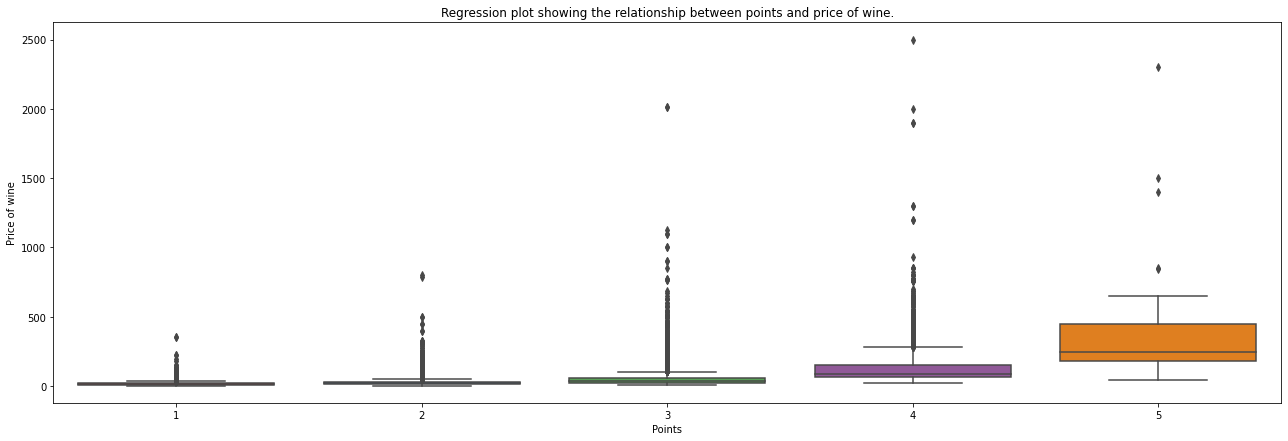

There exist a rise in the price of wine as the allocated points by the reviewers increase which is evident in the plot above and below.


In [104]:
#Relationship between the price and points of wine.
plt.figure(figsize=(22,7))
sb.boxplot(x='points_cat',y='price',data=trainwine)
plt.xlabel('Points')
plt.ylabel('Price of wine')
plt.title('Regression plot showing the relationship between points and price of wine.')
plt.show()

print('There exist a rise in the price of wine as the allocated points by the reviewers increase which is evident in the plot above and below.')

<AxesSubplot:>

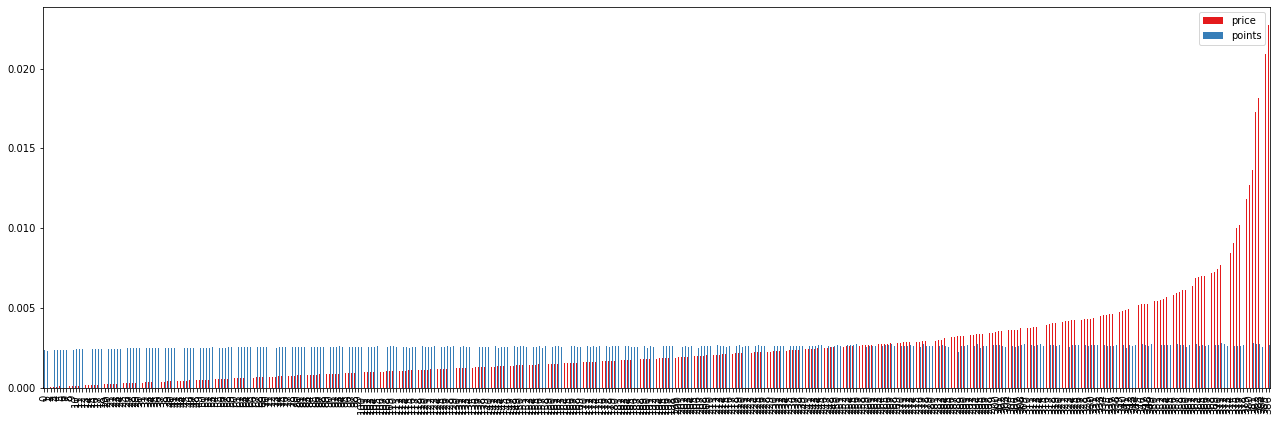

In [105]:
wag = trainwine.groupby('price',as_index=False)['points'].mean()
wag.div(wag.sum(0).astype(float)).plot(kind='bar',stacked=False,figsize=(22,7))

In [106]:
# function to display the dataframe
def show_df(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    # check for NA
    avg_df = avg_df.dropna(axis = 0)
    # display top 10
    df1 = avg_df.head(10)
    # display bottom 10
    df2 = avg_df.tail(10)
    
    html_str=''
    for df in [df1,df2]:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 

In [107]:
def cat_plot(df, cat, col,color1,color2):
    avg = df.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(10, col)
    worst = avg.nsmallest(10, col)
    fig, ax = plt.subplots(1,2,figsize = (18,6))
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", ax= ax[0], color=color1,fontsize = 14, title = "Best " + cat + " by " + col,legend=False)
    worst.plot(kind = "barh", ax=ax[1], color=color2,fontsize = 14, title = "Worst " + cat + " by " + col,legend=False)
    ax[0].title.set_size(16) # Set title size
    ax[1].title.set_size(16)
    plt.tight_layout()
    plt.show()

**Country with the best and worst wine, by points on average.**
According to the reviewers, England has the best wines followed by Austria then Germany and it's surprising that see France rank 7th after Switzerland and even India. It is also shocking not to see US feature in the first 10 countries with the best wines.

In [108]:
show_df(trainwine,'country','points')

,country,points
13,england,91.148148
3,austria,89.219213
16,germany,88.711864
7,canada,88.483766
41,switzerland,88.428571
14,france,88.170762
30,morocco,88.166667
21,italy,88.029759
19,india,88.000000
28,missing,88.000000


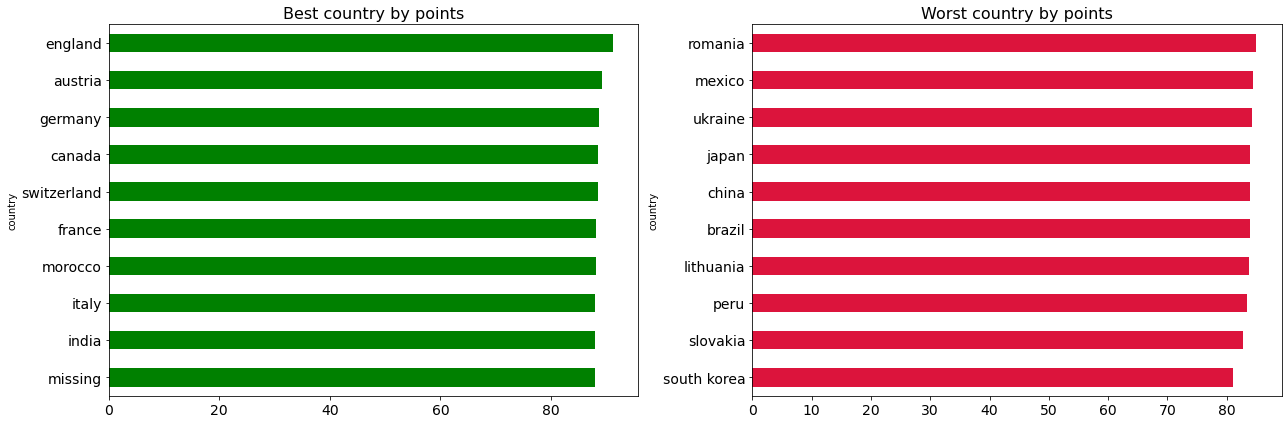

In [109]:
cat_plot(trainwine,'country','points','green','crimson')


**Country with the most expensive and cheapest wine on average.**

It's expected that wines from France and the States were the best but actually they're just the most expensive. So we can already see, expensive does not equal better, when it comes to wine (and probably most things in life!). Similarly, the cheapeast wine doesn't mean it's necessarily the worst wine (except for Montenegro).

In [110]:
show_df(trainwine,'country','price')

,country,price
41,switzerland,62.714286
13,england,51.574074
18,hungary,43.901961
14,france,43.367316
16,germany,40.280000
21,italy,38.804166
45,us,35.153079
7,canada,35.123377
20,israel,32.243466
2,australia,32.185269


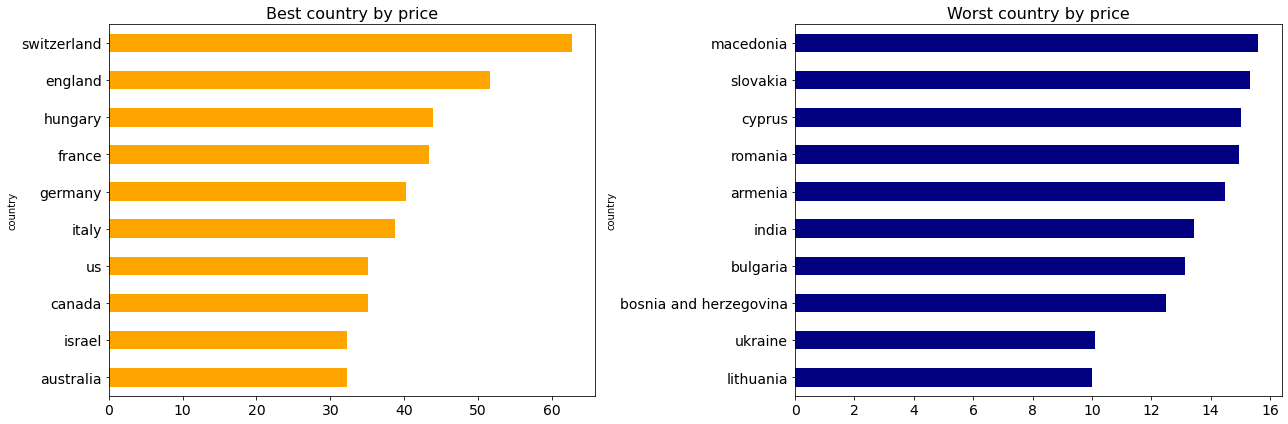

In [111]:
cat_plot(trainwine,'country','price','orange','navy')

**Price by variety to know if some varieties are expensive.**

The most expensive winery is château pétrus and it is located in France with an average price of 2000 dolalrs. Surprisingly, 8 out of the 10 most expensive wineries are all located France. Only screaming eagle in the US and masseto in Italy could make it into the first 10 most expensive wineries' list. The cheapest winery is broke ass and it is also located in Argentina with an average price of 4 dollars.



In [112]:
show_df(trainwine,'winery','price')

,winery,price
4325,château pétrus,2000.000000
5929,domaine du comte liger-belair,1812.500000
3310,château d'yquem,800.000000
4021,château latour,691.166667
1368,blair,610.142857
3766,château haut-brion,598.600000
10755,masseto,587.500000
4034,château laville haut-brion,580.000000
3964,château lafite rothschild,542.500000
13917,screaming eagle,500.000000


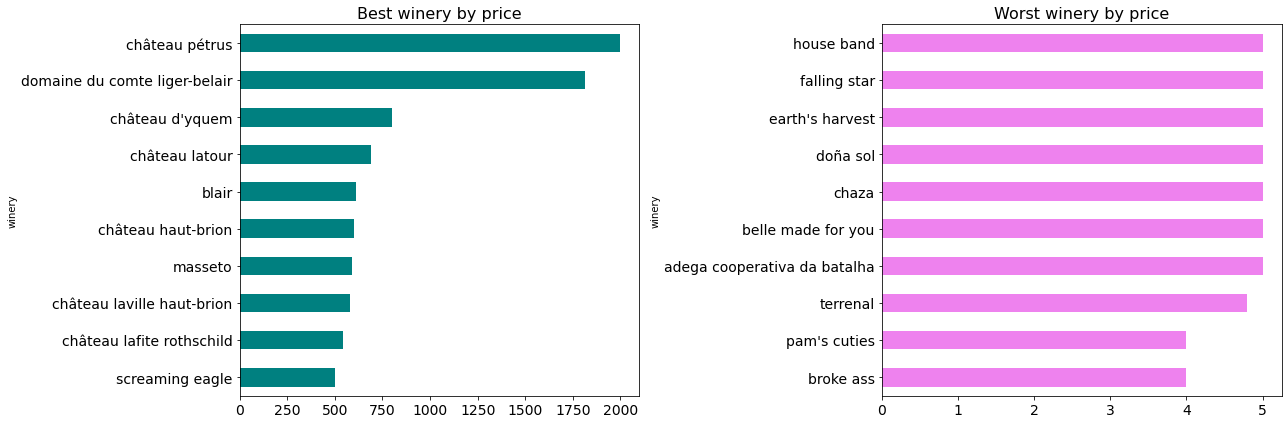

In [113]:
cat_plot(trainwine,'winery','price','teal','violet')

In [114]:
# Description length for the train data
trainwine["desc_len"] = trainwine['description'].apply(len)
trainwine["num_words_desc"] = trainwine['description'].map(lambda x: len(x.split()))

testwine["desc_len"] = testwine['description'].apply(len)
testwine["num_words_desc"] = testwine['description'].map(lambda x: len(x.split()))

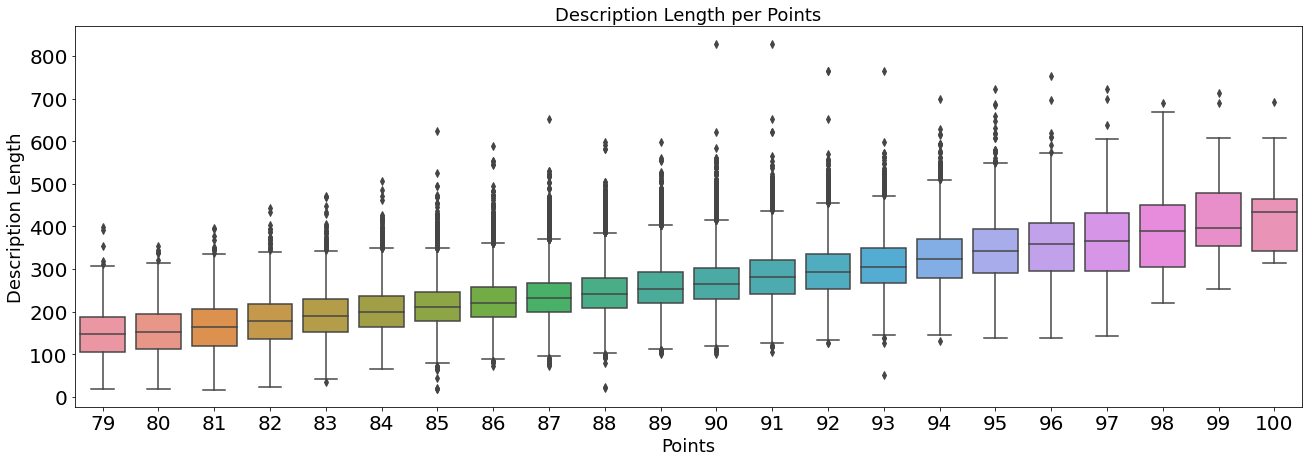

In [115]:
fig, ax = plt.subplots(figsize=(22,7))
sb.boxplot(x='points', y='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', size=18) 
ax.set_ylabel('Description Length', fontsize = 18) # Y label
ax.set_xlabel('Points', fontsize = 18) # X label
plt.show()

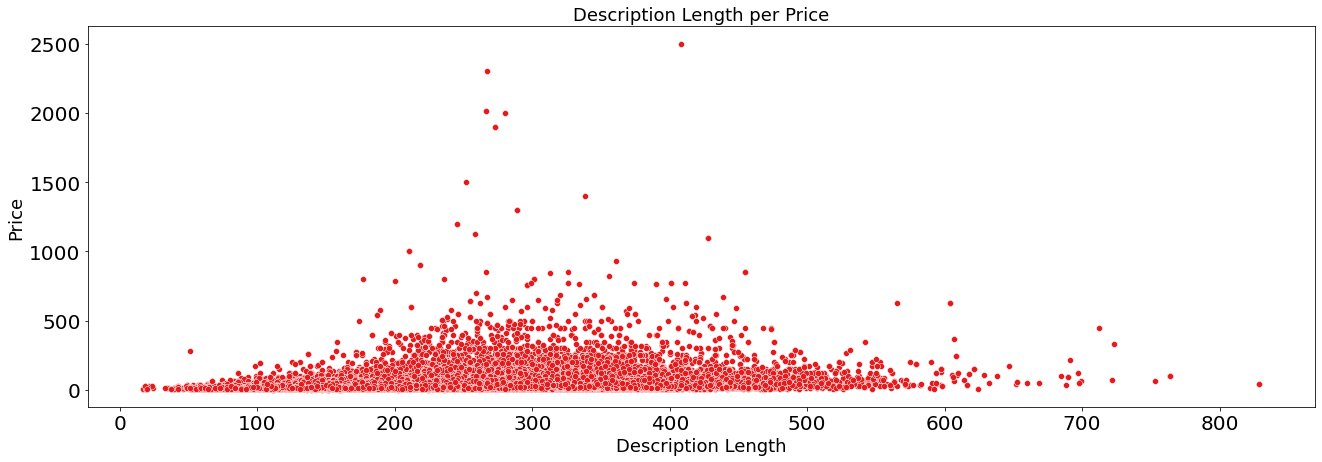

In [116]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='price', x='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Price', size=18) 
ax.set_xlabel('Description Length', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

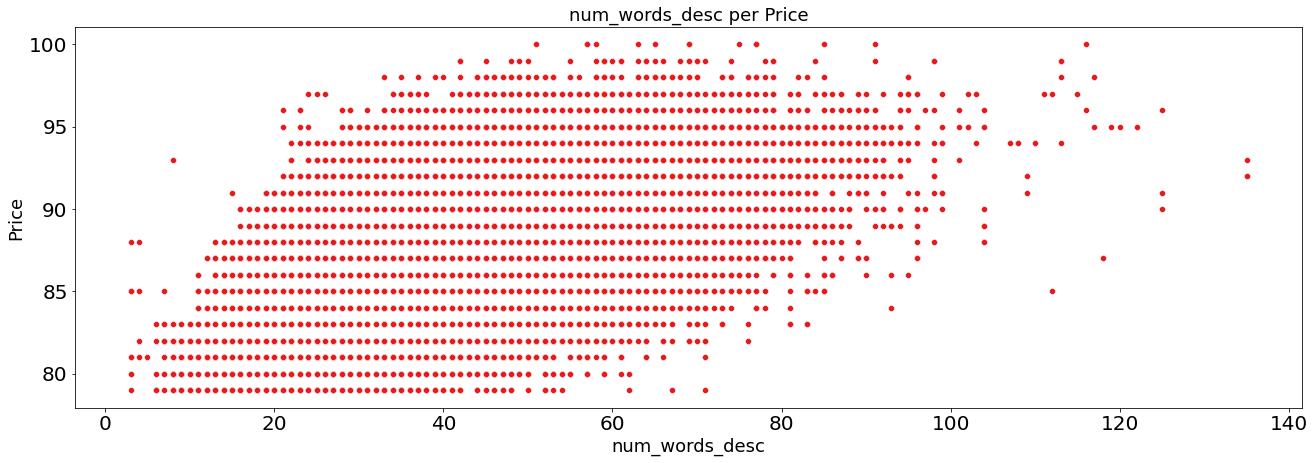

In [117]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='points', x='num_words_desc', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('num_words_desc per Price', size=18) 
ax.set_xlabel('num_words_desc', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

In [118]:
#Model Building

In [119]:
import math
import keras
import itertools
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV

In [120]:
#Split data into train and test
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,missing,portuguese red,j. portugal ramos,2,267,46
71079,france,"a solid, chunky wine, with a structure that is...",missing,88,28.0,bordeaux,lalande de pomerol,bordeaux-style red blend,château tour grand colombier,2,225,41
32440,france,"this is powerful and concentrated, with the hi...",missing,94,130.0,bordeaux,saint-émilion,bordeaux-style red blend,château figeac,3,199,33
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,petite sirah,jaffurs,3,187,31
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,rosé,syncline,3,290,51


In [121]:
testwine.head()

,country,description,designation,points,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,cabernet sauvignon,salvestrin,4,342,57
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,syrah,les vins de vienne,3,227,37
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,cabernet franc,brave & maiden,2,300,55
3,us,white flowers and wild anise give this a crisp...,missing,89,california,sonoma coast,chardonnay,les voleurs,3,196,32
4,us,pinot gris has been making inroads in washingt...,missing,88,washington,columbia valley (wa),pinot gris,chateau ste. michelle,2,201,35


In [122]:
# Split data into train and test
train_size = int(len(trainwine) * .8)

print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(trainwine) - train_size))

Train size: 140000
Test size: 35000


In [123]:
# encoding the categorical features
catfeat = ['country', 'designation', 'province','region_1', 'variety', 'winery']
encoder_dict = {}
for i in catfeat:
  t = trainwine.groupby([i])['price'].mean().sort_values(ascending=True).index
  encoder_dict[i] = {k:i for i,k in enumerate(t,0)}

for i in catfeat:
  trainwine[i] = trainwine[i].map(encoder_dict[i])
  testwine[i] = testwine[i].map(encoder_dict[i])

In [124]:
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,,
32027,28,this is a fine rich balanced wine. it has ripe...,11450,88,20.0,226,713,403,5680,2,267,46
71079,42,"a solid, chunky wine, with a structure that is...",18992,88,28.0,428,901,663,10051,2,225,41
32440,42,"this is powerful and concentrated, with the hi...",18992,94,130.0,428,1190,663,16802,3,199,33
124405,39,"rich, ripe and oaky, this petite sirah charms ...",24176,89,34.0,411,828,519,12947,3,187,31
33649,39,this wine is a unique in the state blend and f...,19017,89,24.0,364,878,214,10261,3,290,51


In [126]:
trainset = trainwine.sample(frac=.8,random_state=10)
testset = trainwine.drop(index=trainset.index)
print(trainset.shape)
print(testset.shape)

(140000, 12)
(18744, 12)


In [127]:
ytrain = trainset['price']
xtrain = trainset.drop(['price','description','points'],axis=1)
ytest = testset['price']
xtest = testset.drop(['price','description','points'],axis=1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(140000, 9)
(140000,)
(18744, 9)
(18744,)


In [ ]:
#Unscaled Models

In [130]:
# LinearRegression
lin = LinearRegression(n_jobs=-1)
lin = lin.fit(xtrain,ytrain)
linpred = lin.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,linpred))
print('The RMSE for the linear regression model is {}.'.format(rmse))
pd.DataFrame({'actual_price':ytest,'predicted_price':linpred}).head()

The RMSE for the linear regression model is 27.460822088815245.


,actual_price,predicted_price
id,,
132767,17.0,27.190679
132328,17.0,16.552802
146382,40.0,32.373708
109813,13.0,16.805252
12842,33.0,37.458144


In [132]:
# RandomForest
rand = RandomForestRegressor(max_features=None,n_estimators=800,max_depth=29,random_state=10,n_jobs=-1)#{10 :md=29: 11.25,ne=800}
rand = rand.fit(xtrain,ytrain)
randpred = rand.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,randpred))
print('The RMSE for the random forest model is {}.'.format(rmse))
pd.DataFrame({'actual_price':ytest,'predicted_price':randpred}).head(10)

The RMSE for the random forest model is 11.380894965022813.


,actual_price,predicted_price
id,,
132767,17.0,17.891000
132328,17.0,18.452010
146382,40.0,30.851774
109813,13.0,13.055000
12842,33.0,30.433924
28612,80.0,80.296174
92494,45.0,50.566567
142910,24.0,21.301655
64291,7.0,7.002500


In [133]:
test = testwine.drop(['description','points_cat'],axis=1)
testpred = rand.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- points
Feature names seen at fit time, yet now missing:
- points_cat

  warnings.warn(message, FutureWarning)


In [177]:
#rand_sub = pd.DataFrame({'Id':testwine['id'],'price':testpred})
#rand_sub.shape

In [135]:
importance = list(rand.feature_importances_)
feat_importance = [(i,round(importance,2)) for i, importance in zip(xtrain.columns,importance)]
feat_importance

[('country', 0.01),
 ('designation', 0.48),
 ('province', 0.01),
 ('region_1', 0.1),
 ('variety', 0.02),
 ('winery', 0.32),
 ('points_cat', 0.02),
 ('desc_len', 0.03),
 ('num_words_desc', 0.03)]

In [136]:
# Gradient Boosting
grad = GradientBoostingRegressor(random_state=40)#40
grad = grad.fit(xtrain,ytrain)
gradpred = grad.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,gradpred))
print('The RMSE for the gardient boosting regressor model is {}.'.format(rmse))
pd.DataFrame({'actual_price':ytest,'predicted_price':gradpred}).head()

The RMSE for the gardient boosting regressor model is 14.139397307683566.


,actual_price,predicted_price
id,,
132767,17.0,20.781087
132328,17.0,16.760828
146382,40.0,34.686764
109813,13.0,17.672755
12842,33.0,29.338452


In [147]:
#Neural network

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(xtrain.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=64, activation='relu'))
network.add(layers.Dense(units=128, activation='relu'))
network.add(layers.Dense(units=256, activation='relu'))
network.add(layers.Dense(units=512, activation='relu'))
network.add(layers.Dense(units=1024, activation='relu'))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='adam', # Optimization algorithm
                metrics=['mse']) # Mean squared error

# Train neural network
history = network.fit(xtrain, # Features
                      ytrain, # Target vector
                      epochs=10, # Number of epochs
                      verbose=1, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(xtest, ytest)) # Data for evaluation

Epoch 1/10
140/140 [==============================] - 2s 15ms/step - loss: 195978.9219 - mse: 195978.9219 - val_loss: 749.3007 - val_mse: 749.3007
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 960.0551 - mse: 960.0551 - val_loss: 741.5137 - val_mse: 741.5137
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 943.6404 - mse: 943.6404 - val_loss: 742.6203 - val_mse: 742.6203
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 936.3239 - mse: 936.3239 - val_loss: 718.7599 - val_mse: 718.7599
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 918.5059 - mse: 918.5059 - val_loss: 698.0713 - val_mse: 698.0713
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 916.3270 - mse: 916.3270 - val_loss: 732.0607 - val_mse: 732.0607
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 904.4091 - mse: 904.4091 - val_loss: 679.6392 - val_mse: 679.6392
Epoch 8/10
14

In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [153]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = xtrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________


In [154]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [155]:
NN_model.fit(xtrain,ytrain, epochs=15, batch_size=32, validation_data=(xtest, ytest), callbacks=callbacks_list)

Epoch 1/15
4375/4375 [==============================] - 11s 2ms/step - loss: 1020.5943 - mean_squared_error: 1020.5943 - val_loss: 744.2375 - val_mean_squared_error: 744.2375

Epoch 00001: val_loss improved from inf to 744.23749, saving model to Weights-001--744.23749.hdf5
Epoch 2/15
4375/4375 [==============================] - 9s 2ms/step - loss: 932.4967 - mean_squared_error: 932.4967 - val_loss: 704.0664 - val_mean_squared_error: 704.0664

Epoch 00002: val_loss improved from 744.23749 to 704.06641, saving model to Weights-002--704.06641.hdf5
Epoch 3/15
4375/4375 [==============================] - 10s 2ms/step - loss: 910.1821 - mean_squared_error: 910.1821 - val_loss: 703.3586 - val_mean_squared_error: 703.3586

Epoch 00003: val_loss improved from 704.06641 to 703.35858, saving model to Weights-003--703.35858.hdf5
Epoch 4/15
4375/4375 [==============================] - 9s 2ms/step - loss: 890.9503 - mean_squared_error: 890.9503 - val_loss: 721.7251 - val_mean_squared_error: 721.7251

In [188]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id': trainwine['id'],'price':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

In [ ]:
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'submission(NN).csv')